In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read in the original CDC csv file

alzheimer = pd.read_csv('C:/Users/BoJangles/Desktop/SB First Project/Potential Datasets/Workable Dataset/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')

In [3]:
#Sorting everything by State location, drop the uncessary columns and then generate a list of the remaining columns
alzheimer_by_age = alzheimer.sort_values(by=['LocationID'])
alzheimer_by_age.columns.tolist()


alzheimer_by_age = alzheimer_by_age.drop(alzheimer_by_age.columns[[2,4,8,9,10,14,15,18,21,22,23,24,29,33,34,35,36,37]], axis=1)

alzheimer_by_age_col_list = alzheimer_by_age.columns.tolist()
alzheimer_by_age_col_list

['YearStart',
 'YearEnd',
 'LocationDesc',
 'Class',
 'Topic',
 'Question',
 'Data_Value_Type',
 'Data_Value',
 'Data_Value_Alt',
 'Low_Confidence_Limit',
 'High_Confidence_Limit',
 'StratificationCategory1',
 'Stratification1',
 'GeoLocation',
 'ClassID',
 'TopicID',
 'QuestionID',
 'LocationID',
 'StratificationCategoryID1',
 'StratificationID1']

In [4]:
#Moved the LocationID column to the very beginning and then made a new csv file 
alzheimer_by_age_col_list = [alzheimer_by_age_col_list[18]] + alzheimer_by_age_col_list[:-1]
alzheimer_by_age = alzheimer_by_age[alzheimer_by_age_col_list]
#alzheimer_by_age.to_csv('alzheimer_by_age.csv')

In [5]:
#Read in the newly created csv file above
alzheimer_by_age_2 = pd.read_csv('C:/Users/BoJangles/Desktop/SB First Project/Potential Datasets/Workable Dataset/alzheimer_by_age.csv')

In [6]:
#Look at all of the unique LocationID numbers - this is actually pointless
alzheimer_by_age_2['LocationID'].unique()

array([   1,    2,    4,    5,    6,    8,    9,   10,   11,   12,   13,
         15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,
         26,   27,   28,   29,   30,   31,   32,   33,   34,   35,   36,
         37,   38,   39,   40,   41,   42,   44,   45,   46,   47,   48,
         49,   50,   51,   53,   54,   55,   56,   59,   66,   72,   78,
       9001, 9002, 9003, 9004], dtype=int64)

In [7]:
#Sorted everything by Question and made a new csv file
alzheimer_by_age_2 = alzheimer_by_age_2.sort_values(by=['Question'])
#alzheimer_by_age_2.to_csv('alzheimer_by_age2.csv')

In [8]:
#Dropped more uncessary columns and removed the columns that had empty Data_Value cells
alzheimer_by_age_3 = alzheimer_by_age_2.drop(alzheimer_by_age_2.columns[[0,2, 7,8,12, 15, 18, 19, 20, 21]], axis=1)


alzheimer_by_age_3['Data_Value'].replace('', np.nan, inplace=True)
alzheimer_by_age_3['Low_Confidence_Limit'].replace('', np.nan, inplace=True)
alzheimer_by_age_3['High_Confidence_Limit'].replace('', np.nan, inplace=True)

alzheimer_by_age_3.dropna(subset=['Data_Value'], inplace=True)
alzheimer_by_age_3.dropna(subset=['Low_Confidence_Limit'], inplace=True)
alzheimer_by_age_3.dropna(subset=['High_Confidence_Limit'], inplace=True)

In [9]:
#Generated a list of unique questions 
alzheimer_by_age_3['Question'].unique()

array(['Average of 20 or more hours of care per week provided to a friend or family member',
       'Mean number of days with activity limitations in the past month',
       'Percentage of at risk adults (have diabetes, asthma, cardiovascular disease or currently smoke) who ever had a pneumococcal vaccine',
       'Percentage of older adult men who are up to date with select clinical preventive services',
       'Percentage of older adult women who are up to date with select clinical preventive services',
       'Percentage of older adult women who have received a mammogram within the past 2 years',
       'Percentage of older adult women with an intact cervix who had a Pap test within the past 3 years',
       'Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years',
       'Percentage of older adults getting sufficient sleep (>6 hours)',
       'Percentage of older adults who are currently obese, with 

# Below I go through each questions and generated a bargraph comparing the percentage values for each question asked by state/territory 

Text(0, 0.5, 'Percentage of older adult men who are up to date with select clinical preventive services')

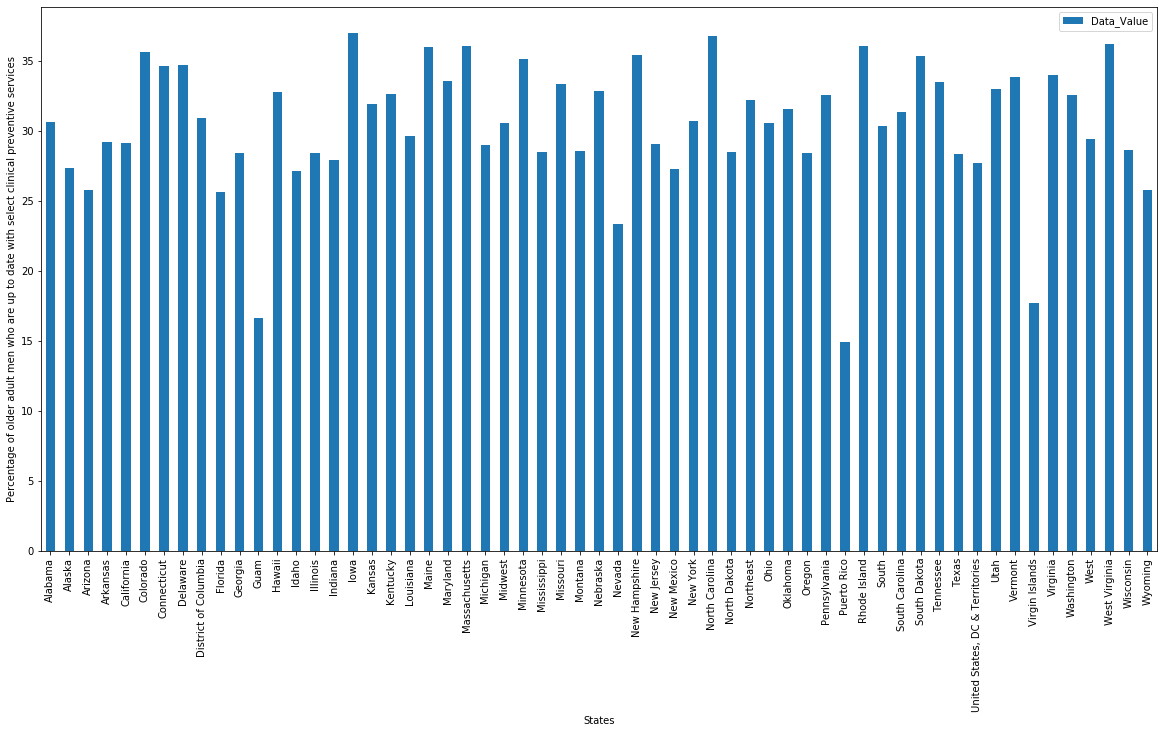

In [10]:
# Percentage of older adult men who are up to date with select clinical preventive services'
alzheimer_by_age_3_Q1 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adult men who are up to date with select clinical preventive services']

#taking only the Data values and State columns
alzheimer_by_age_3_Q1_Data = alzheimer_by_age_3_Q1[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q1_Data[alzheimer_by_age_3_Q1_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q1_Data_Averaged = alzheimer_by_age_3_Q1_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q1_Data_Averaged.duplicated(subset=None, keep='first')

#alzheimer_by_age_3_Q1_Data_Averaged.to_csv('alzheimer_by_age_3_Q1_Data_Averaged.csv')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q1_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adult men who are up to date with select clinical preventive services')



Text(0, 0.5, 'Percentage of older adult women who are up to date with select clinical preventive services')

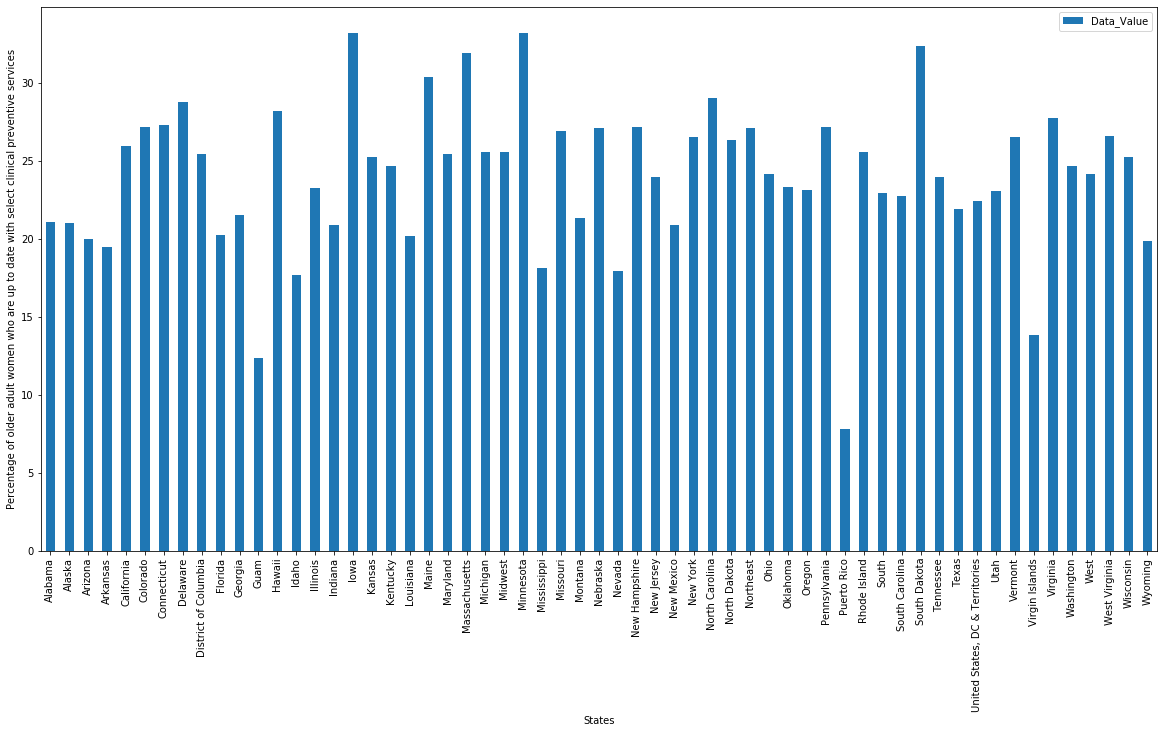

In [11]:
#Percentage of older adult women who are up to date with select clinical preventive services
alzheimer_by_age_3_Q2 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adult women who are up to date with select clinical preventive services']

#taking only the Data values and State columns
alzheimer_by_age_3_Q2_Data = alzheimer_by_age_3_Q2[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q2_Data[alzheimer_by_age_3_Q2_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q2_Data_Averaged = alzheimer_by_age_3_Q2_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q2_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q2_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adult women who are up to date with select clinical preventive services')


# For Question 1 and Question 2, I will run a t-test to see whether the overall mean of Question 1[ Percentage of older adult men who are up to date with select clinical preventive services] is significantly different from the overall mean of Question 2[Percentage of older adult women who are up to date with select clinical preventive services]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002715C48DBC8>],
      dtype=object)

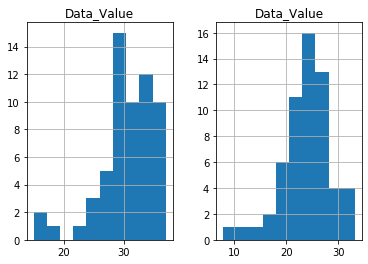

In [31]:
#Normality check with histograms:

fig, axes = plt.subplots(1, 2)

#Men - Percentage of older adult men who are up to date with select clinical preventive services
alzheimer_by_age_3_Q1_Data_Averaged.hist(['Data_Value'], ax=axes[0])

#Women - Percentage of older adult women who are up to date with select clinical preventive services
alzheimer_by_age_3_Q2_Data_Averaged.hist(['Data_Value'], ax=axes[1])






Roughly normal distribution, I will proceed with my t-test

In [15]:
from scipy import stats


#Calculating means:

#Men
mean_alzheimer_by_age_3_Q1 = int(sum(alzheimer_by_age_3_Q1_Data_Averaged['Data_Value'])/len(alzheimer_by_age_3_Q1_Data_Averaged['Data_Value']))
#Women
mean_alzheimer_by_age_3_Q2 = int(sum(alzheimer_by_age_3_Q2_Data_Averaged['Data_Value'])/len(alzheimer_by_age_3_Q2_Data_Averaged['Data_Value']))

#Calculating Standard Deviation 

#Men
std_alzheimer_by_age_3_Q1 = np.std(alzheimer_by_age_3_Q1_Data_Averaged['Data_Value'], ddof=1)
#Women
std_alzheimer_by_age_3_Q2 = np.std(alzheimer_by_age_3_Q2_Data_Averaged['Data_Value'], ddof=1)

#Calculate standard errors

#Men
se_alzheimer_by_age_3_Q1 = stats.sem(alzheimer_by_age_3_Q1_Data_Averaged['Data_Value'])
#Women
se_alzheimer_by_age_3_Q2 = stats.sem(alzheimer_by_age_3_Q2_Data_Averaged['Data_Value'])

# standard error on the difference between the samples

sed_Q1_Q2 = np.sqrt(se_alzheimer_by_age_3_Q1**2.0 + se_alzheimer_by_age_3_Q2**2.0)

#Calculate T-statstic 

t = (mean_alzheimer_by_age_3_Q1 - mean_alzheimer_by_age_3_Q2) / sed_Q1_Q2

#Degree of freedom

df = len(alzheimer_by_age_3_Q1_Data_Averaged['Data_Value']) + len(alzheimer_by_age_3_Q2_Data_Averaged['Data_Value']) -2 

#calculating the p-value

p = (1 - stats.t.cdf(abs(t), df)) * 2

print("p-value is:", p, "\n t-statstic is:", t)    
print("The t-test indictated that overall, men are significantly more up to date with select clinical preventive services than women")


p-value is: 1.8730017536938703e-10 
 t-statstic is: 6.989005625607615
The t-test indictated that overall, men are significantly more up to date with select clinical preventive services than women


In [17]:
from scipy import stats

#Percentage of older adult men who are up to date with select clinical preventive services - Guam

#alzheimer_by_age_3_Q1_Data_Averaged = alzheimer_by_age_3_Q1_Data_Averaged.reset_index()

alzheimer_by_age_3_Q1_Guam = alzheimer_by_age_3_Q1_Data_Averaged[alzheimer_by_age_3_Q1_Data_Averaged.LocationDesc == 'Guam']

alzheimer_by_age_3_Q1_Guam_Value = alzheimer_by_age_3_Q1_Guam['Data_Value']

#Percentage of older adult women who are up to date with select clinical preventive services - Guam

#alzheimer_by_age_3_Q2_Data_Averaged = alzheimer_by_age_3_Q2_Data_Averaged.reset_index()

alzheimer_by_age_3_Q2_Guam = alzheimer_by_age_3_Q2_Data_Averaged[alzheimer_by_age_3_Q2_Data_Averaged.LocationDesc == 'Guam']

alzheimer_by_age_3_Q2_Guam_Value = alzheimer_by_age_3_Q2_Guam['Data_Value']




In [ ]:
#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q1_Guam_Value.plot.bar(ax=ax)
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q2_Guam_Value.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adult women who are up to date with select clinical preventive services')

Text(0, 0.5, 'Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years')

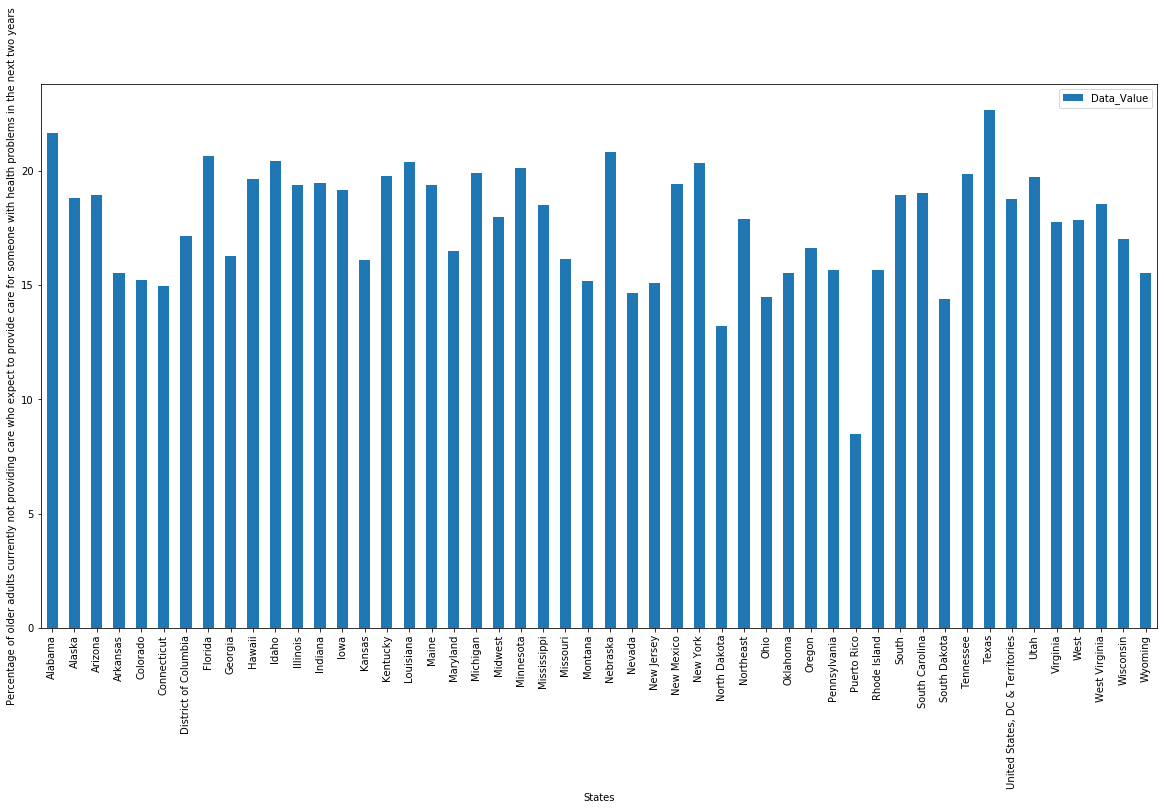

In [25]:
#Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years
alzheimer_by_age_3_Q3 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years']

#taking only the Data values and State columns
alzheimer_by_age_3_Q3_Data = alzheimer_by_age_3_Q3[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q3_Data[alzheimer_by_age_3_Q3_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q3_Data_Averaged = alzheimer_by_age_3_Q3_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q3_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q3_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults currently not providing care who expect to provide care for someone with health problems in the next two years')


Not a significant difference between richer states such as New York and poor states such as Tennessee (both approximately has a value of 20). Only outlier is Puerto Rico with a percentage value of ~8. This is surprising, given that the data would suggest older adults currently not providing care in New York and Tennessee are about 3 times as likely as older adults currently not providing care in Puerto Rico to provide care for someone with health problems in the next two years.

Give the population in each state as: 

New York - 19,453,561, 
Tennessee - 6,833,174,
Puerto Rico - 3,193,694,

In the case of New York it can be argued that give it's population is 6.3 times more than that of Puerto Rico, you can expect a much higher number of older adults needing to care for others. In rural Tennessee, this can be explained by the fact that while the population is only ~2 times more than that of Puerto Rico, it is also a very poor state (15% poverty rate vs 14.1% in New York and 44.4% in Puerto Rico). Tennessee being poor could result its older adults being 3 times as likely as older adults currently not providing care in Puerto Rico to provide care for someone with health problems in the next two years with only a 2 times bigger population. 

Finally one interesting fact is that, despite the extreme poverty rate in Puerto Rico, only about 8 percent of its older adults expect to care for someone in the next 2 years. The death rate between all 3 locations are relatively similar so I cannot explain this (782.7 in New York vs 1043.7 in Tennessee vs 922.2 in Puerto Rico). 




Text(0, 0.5, 'Percentage of older adults getting sufficient sleep (>6 hours)')

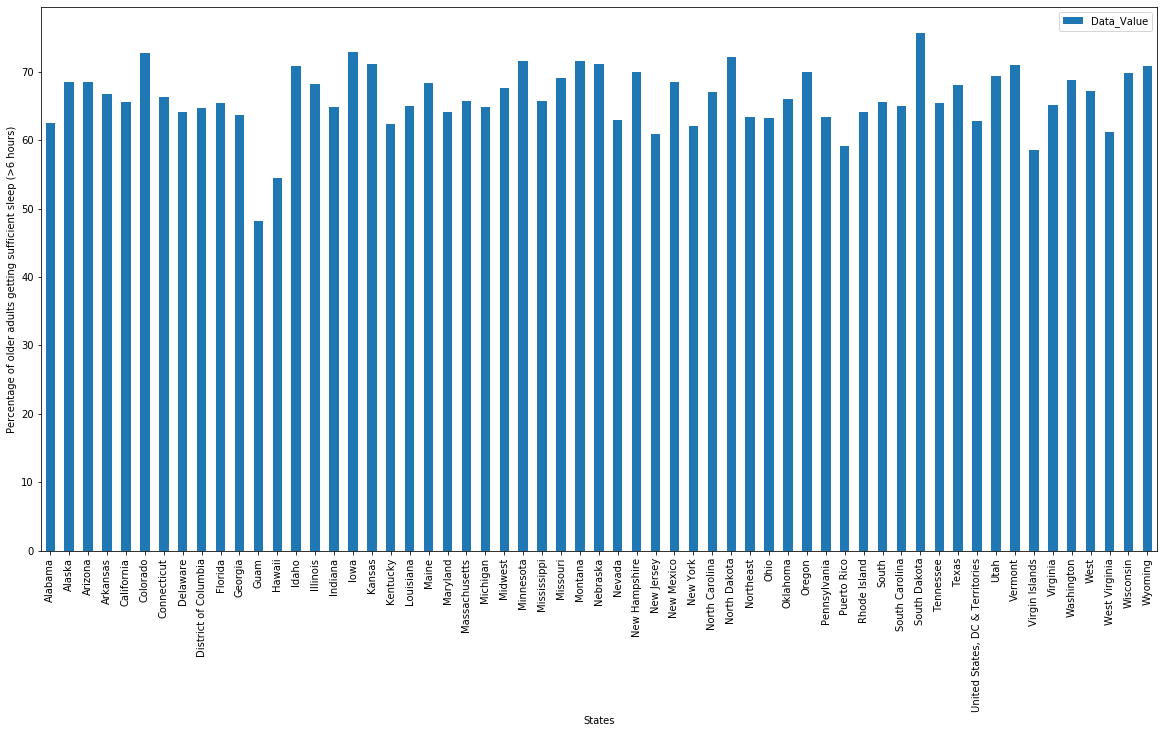

In [26]:
#'Percentage of older adults getting sufficient sleep (>6 hours)
alzheimer_by_age_3_Q4 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults getting sufficient sleep (>6 hours)']

#taking only the Data values and State columns
alzheimer_by_age_3_Q4_Data = alzheimer_by_age_3_Q4[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q4_Data[alzheimer_by_age_3_Q4_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q4_Data_Averaged = alzheimer_by_age_3_Q4_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q4_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q4_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults getting sufficient sleep (>6 hours)')


Only interesting point to point out here is that < 50% of older adults in Guam are getting less than 6 hours of sleep. This is less than even Virgin Islands with both locations having a comparable poverty rate (~22.9 for Guam vs 22.4 for Virgin Islands). Not sure how to explain this other than the presence of the US military base could affect the hours of sleep older adults get (due to noise from military operations on a very small island).

Text(0, 0.5, 'Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more')

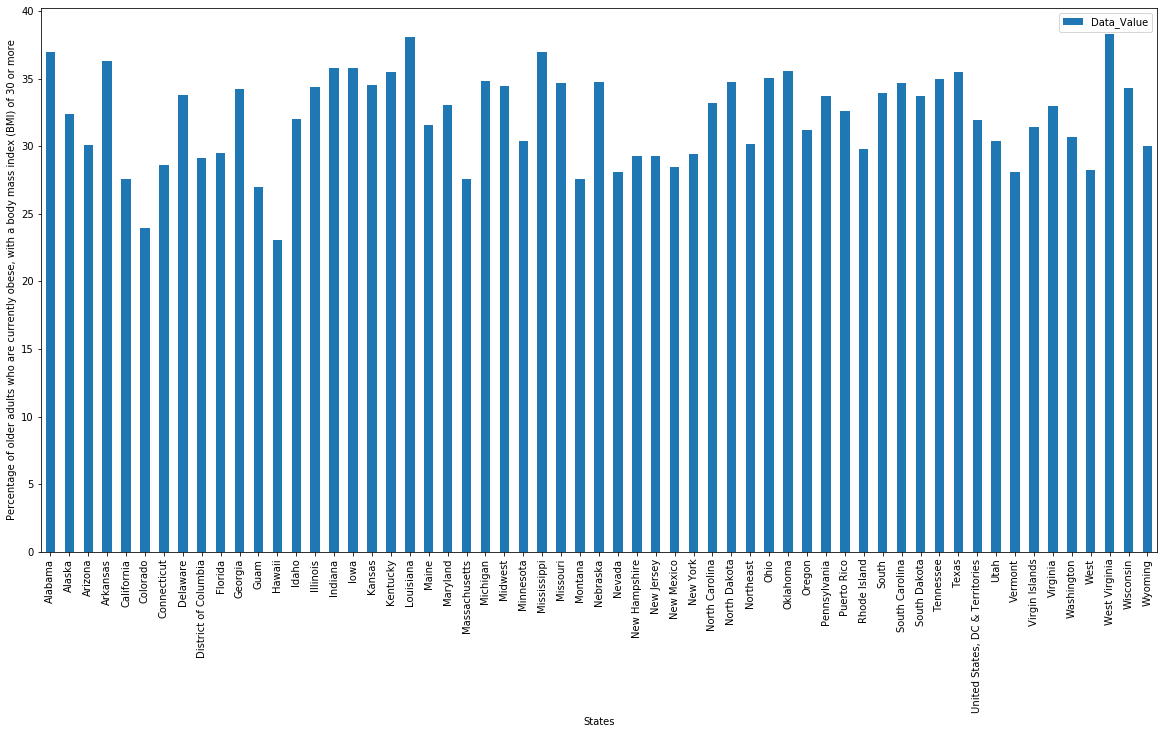

In [27]:
#'Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more'
alzheimer_by_age_3_Q5 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more']

#taking only the Data values and State columns
alzheimer_by_age_3_Q5_Data = alzheimer_by_age_3_Q5[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q5_Data[alzheimer_by_age_3_Q5_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q5_Data_Averaged = alzheimer_by_age_3_Q5_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q5_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q5_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more')


Overall at least 25% of older adults are obese, this is no surprise, America is fast food nation. There are differences between the states, but it is hard to attribute them to one or two factors - local economy, health awareness, weather can all attribute to the obesity. The differences are due to a variety of factors but overall, the data lies around a mean obesity percentage of around 30. 

Text(0, 0.5, 'Percentage of older adults who are eating 2 or more fruits daily')

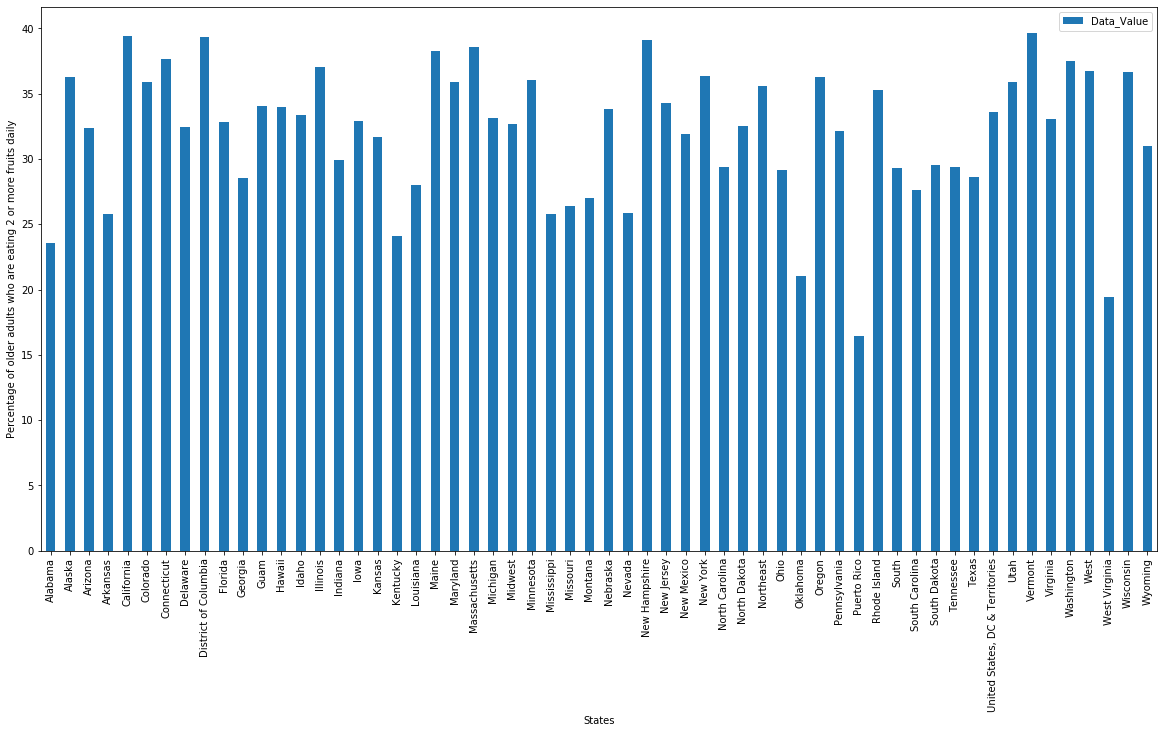

In [29]:
#'Percentage of older adults who are eating 2 or more fruits daily'
alzheimer_by_age_3_Q6 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who are eating 2 or more fruits daily']

#taking only the Data values and State columns
alzheimer_by_age_3_Q6_Data = alzheimer_by_age_3_Q6[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q6_Data[alzheimer_by_age_3_Q6_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q6_Data_Averaged = alzheimer_by_age_3_Q6_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q6_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q6_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who are eating 2 or more fruits daily')


It is very interesting that while in Guam, older adults are getting plenty of fruits (35%), in Puerto Rico and Virgin Islands, a much less percentage of older adults are getting 2 or more fruits daily. This is surprising given the fact that Virgin Islands have the same poverty rate as Guam, yet much less older adults in Virgin Islands are eating less fruits than Guam - them both being island nations. Even their populations are similar (104914 for Virgin Islands and 165718 for Guam). It is possible that the presence of the US military base might benefit the locals as the presence of the US military could result in a surplus of fruits which could then be passed on to the locals (remember, the question doesn't tell the quality of fruits, just that, they are fruits).

Text(0, 0.5, 'Percentage of older adults who are experiencing frequent mental distress')

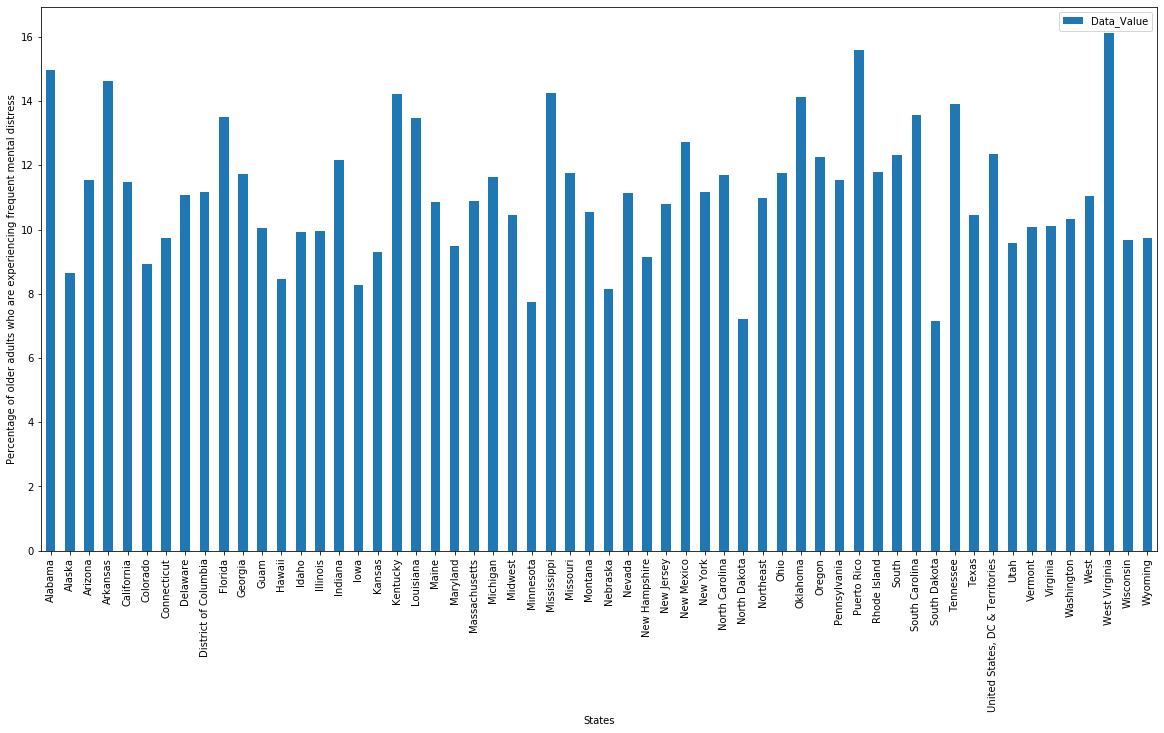

In [31]:
#'Percentage of older adults who are experiencing frequent mental distress'
alzheimer_by_age_3_Q7 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who are experiencing frequent mental distress']

#taking only the Data values and State columns
alzheimer_by_age_3_Q7_Data = alzheimer_by_age_3_Q7[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q7_Data[alzheimer_by_age_3_Q7_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q7_Data_Averaged = alzheimer_by_age_3_Q7_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q7_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q7_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who are experiencing frequent mental distress')


For some reason older adults in US Virgin Islands experiences the highest mental distress, despite Guam with a similiar economy and population experiences much less stress. Obesity could be a reason possibly - almost 40% of the older adults in US Virgin Islands are obese. 

Text(0, 0.5, 'Percentage of older adults who had a cholesterol screening within the past 5 years')

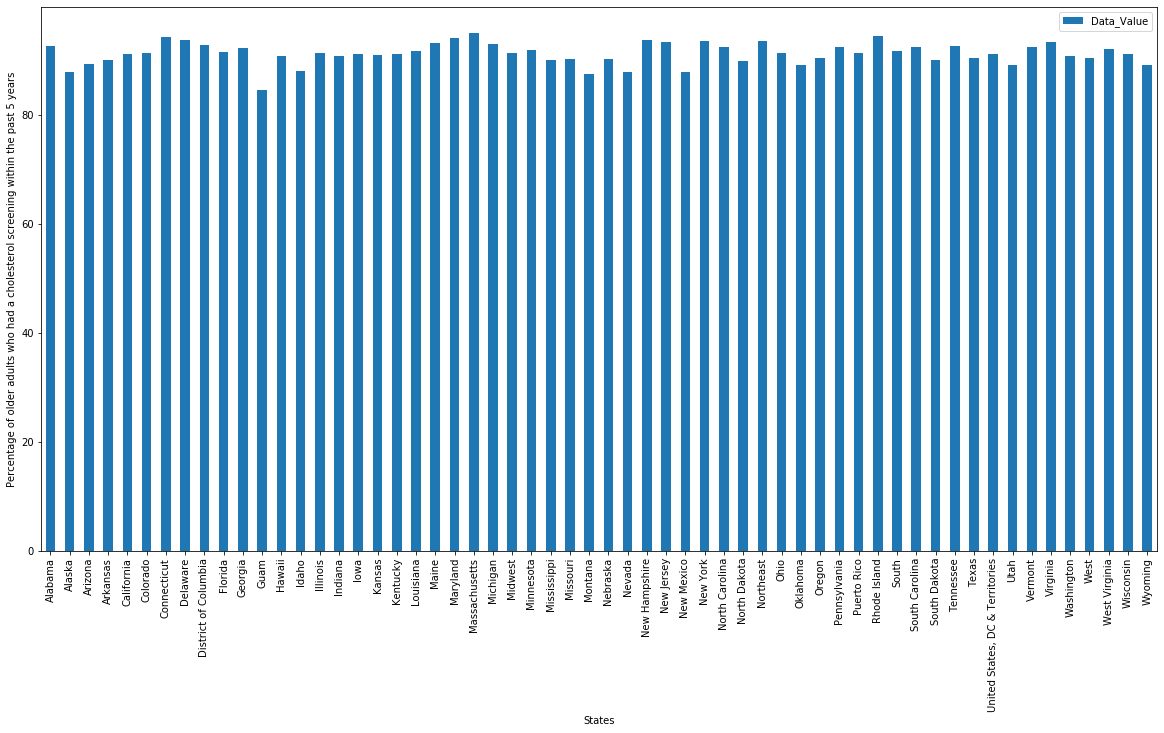

In [32]:
#'Percentage of older adults who had a cholesterol screening within the past 5 years'
alzheimer_by_age_3_Q8 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who had a cholesterol screening within the past 5 years']

#taking only the Data values and State columns
alzheimer_by_age_3_Q8_Data = alzheimer_by_age_3_Q8[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q8_Data[alzheimer_by_age_3_Q8_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q8_Data_Averaged = alzheimer_by_age_3_Q8_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q8_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q8_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who had a cholesterol screening within the past 5 years')


Text(0, 0.5, 'Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years')

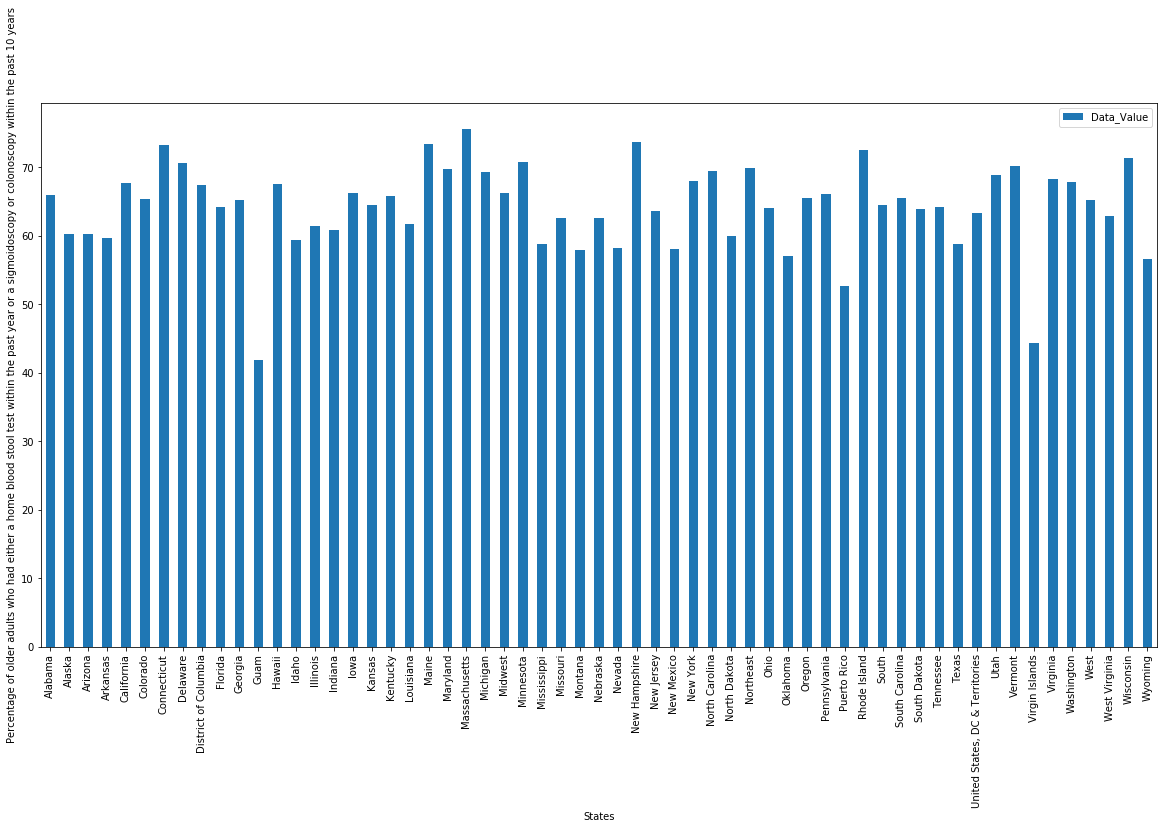

In [33]:
#'Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years'
alzheimer_by_age_3_Q9 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years']

#taking only the Data values and State columns
alzheimer_by_age_3_Q9_Data = alzheimer_by_age_3_Q9[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q9_Data[alzheimer_by_age_3_Q9_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q9_Data_Averaged = alzheimer_by_age_3_Q9_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q9_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q9_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who had either a home blood stool test within the past year or a sigmoidoscopy or colonoscopy within the past 10 years')


The two outliers, Guam and US Virgin Islands, could be attributed to poor economy, as high poverty rate means less people are getting their stool samples checked. 

Text(0, 0.5, 'Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure')

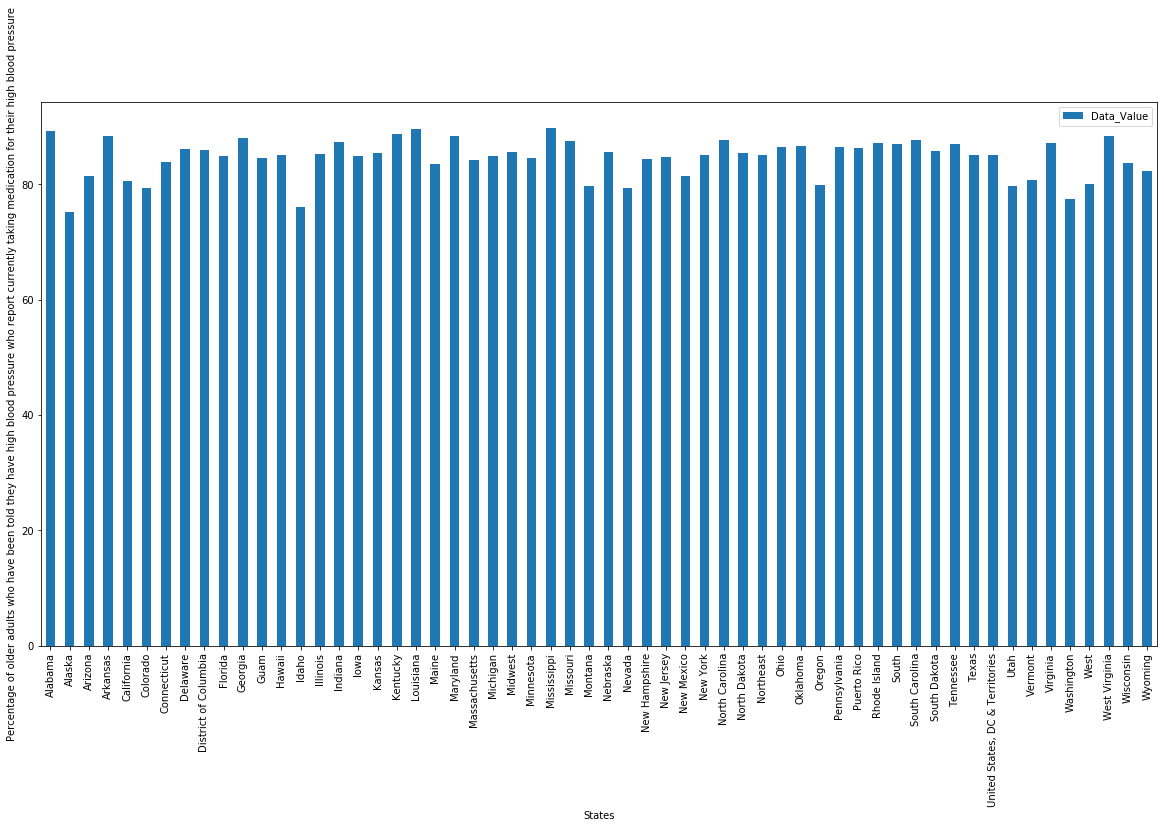

In [34]:
#'Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure'
alzheimer_by_age_3_Q10 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure']

#taking only the Data values and State columns
alzheimer_by_age_3_Q10_Data = alzheimer_by_age_3_Q10[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q10_Data[alzheimer_by_age_3_Q10_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q10_Data_Averaged = alzheimer_by_age_3_Q10_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q10_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q10_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who have been told they have high blood pressure who report currently taking medication for their high blood pressure')


Text(0, 0.5, 'Percentage of older adults who have ever been told by a health professional that they have high blood pressure')

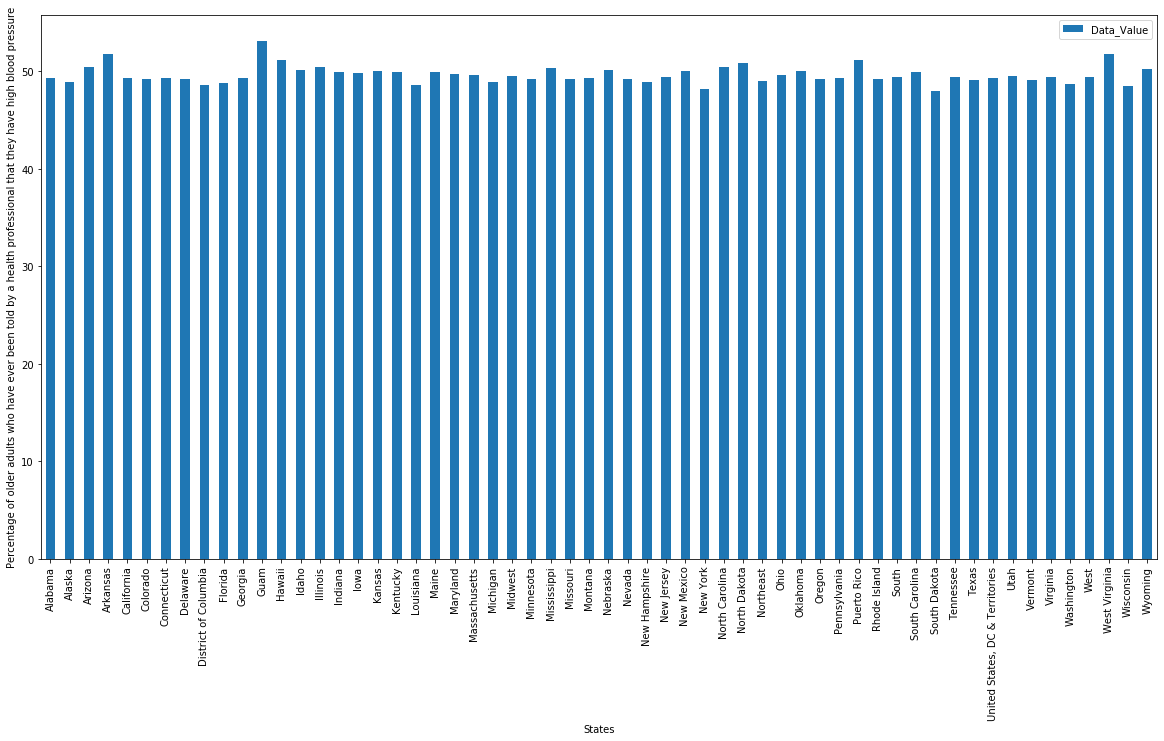

In [35]:
#'Percentage of older adults who have ever been told by a health professional that they have high blood pressure'
alzheimer_by_age_3_Q11 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who have ever been told by a health professional that they have high blood pressure']

#taking only the Data values and State columns
alzheimer_by_age_3_Q11_Data = alzheimer_by_age_3_Q11[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q11_Data[alzheimer_by_age_3_Q11_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q11_Data_Averaged = alzheimer_by_age_3_Q11_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q11_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q11_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who have ever been told by a health professional that they have high blood pressure')


Text(0, 0.5, 'Percentage of older adults who have not had any leisure time physical activity in the past month')

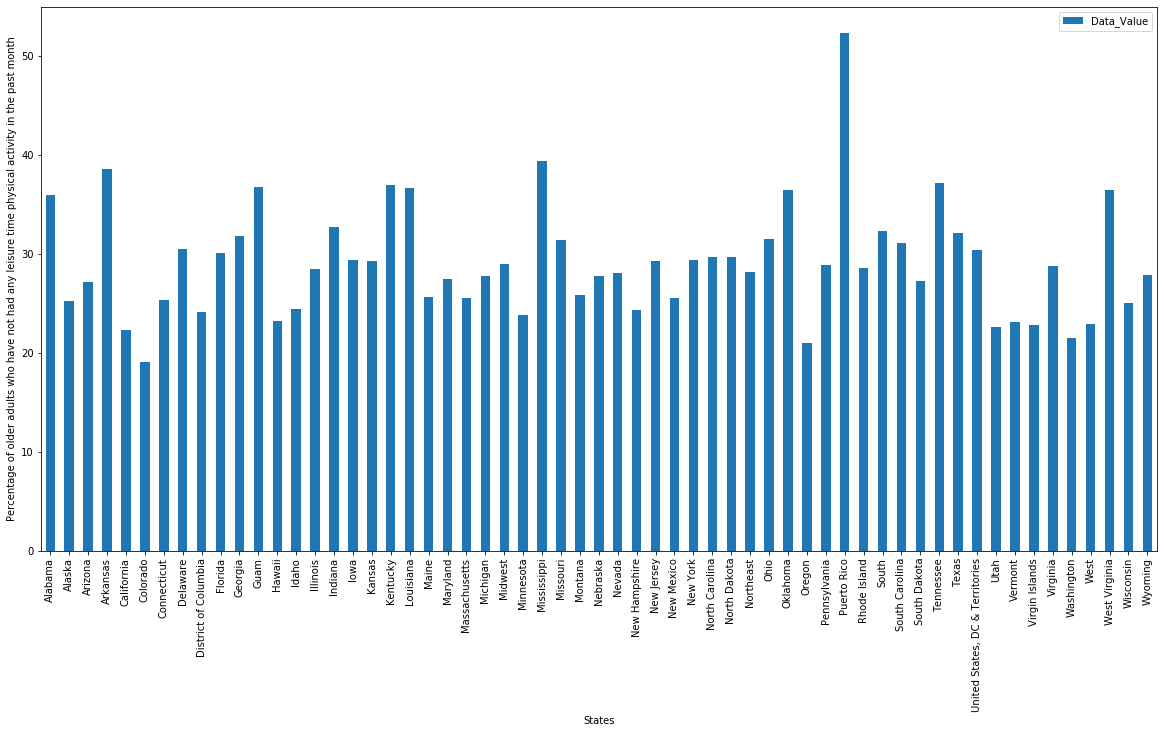

In [36]:
#'Percentage of older adults who have not had any leisure time physical activity in the past month'
alzheimer_by_age_3_Q12 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who have not had any leisure time physical activity in the past month']

#taking only the Data values and State columns
alzheimer_by_age_3_Q12_Data = alzheimer_by_age_3_Q12[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q12_Data[alzheimer_by_age_3_Q12_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q12_Data_Averaged = alzheimer_by_age_3_Q12_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q12_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q12_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who have not had any leisure time physical activity in the past month')


Very interesting to see over half of the older adults in Puerto Rico don't have leisure time. It is possible that the 44.4% poverty rate is a big factor - if half of the island is in poverty, that means their older relatives could not relax and enjoy retirement but rather must work or help with making ends meet. 

Text(0, 0.5, 'Percentage of older adults who provided care for a friend or family member within the past month')

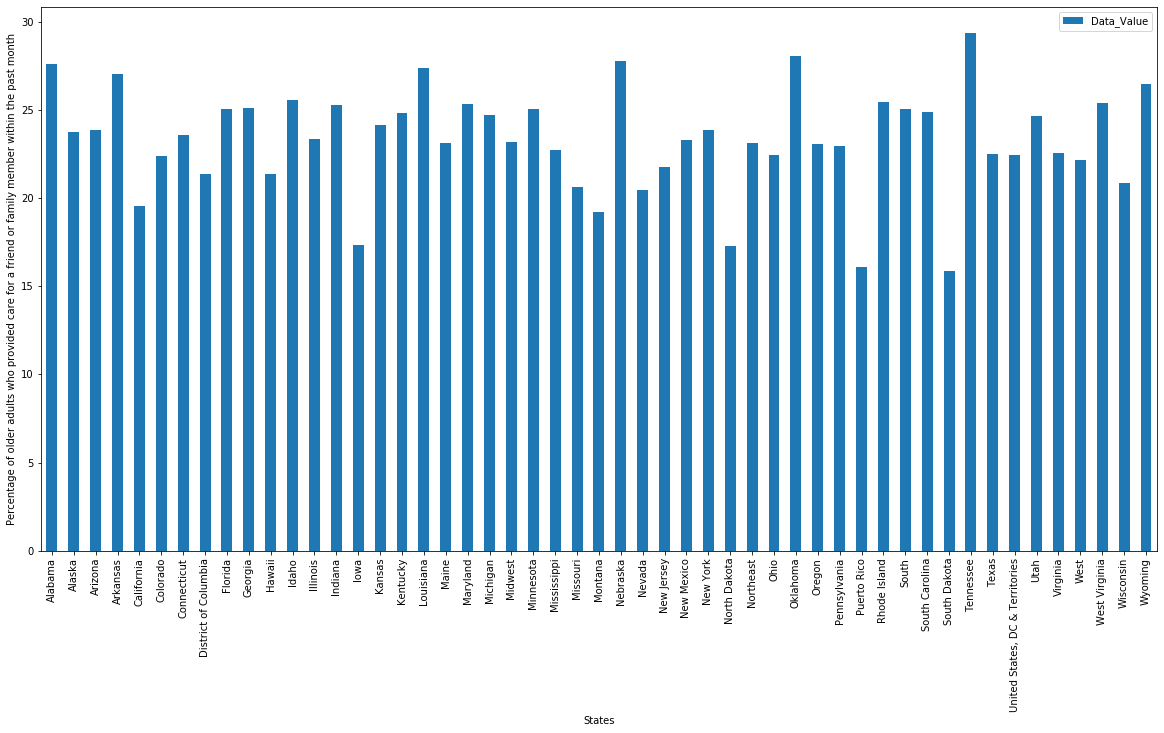

In [37]:
#'Percentage of older adults who provided care for a friend or family member within the past month'
alzheimer_by_age_3_Q13 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who provided care for a friend or family member within the past month']

#taking only the Data values and State columns
alzheimer_by_age_3_Q13_Data = alzheimer_by_age_3_Q13[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q13_Data[alzheimer_by_age_3_Q13_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q13_Data_Averaged = alzheimer_by_age_3_Q13_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q13_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q13_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who provided care for a friend or family member within the past month')


Text(0, 0.5, 'Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month')

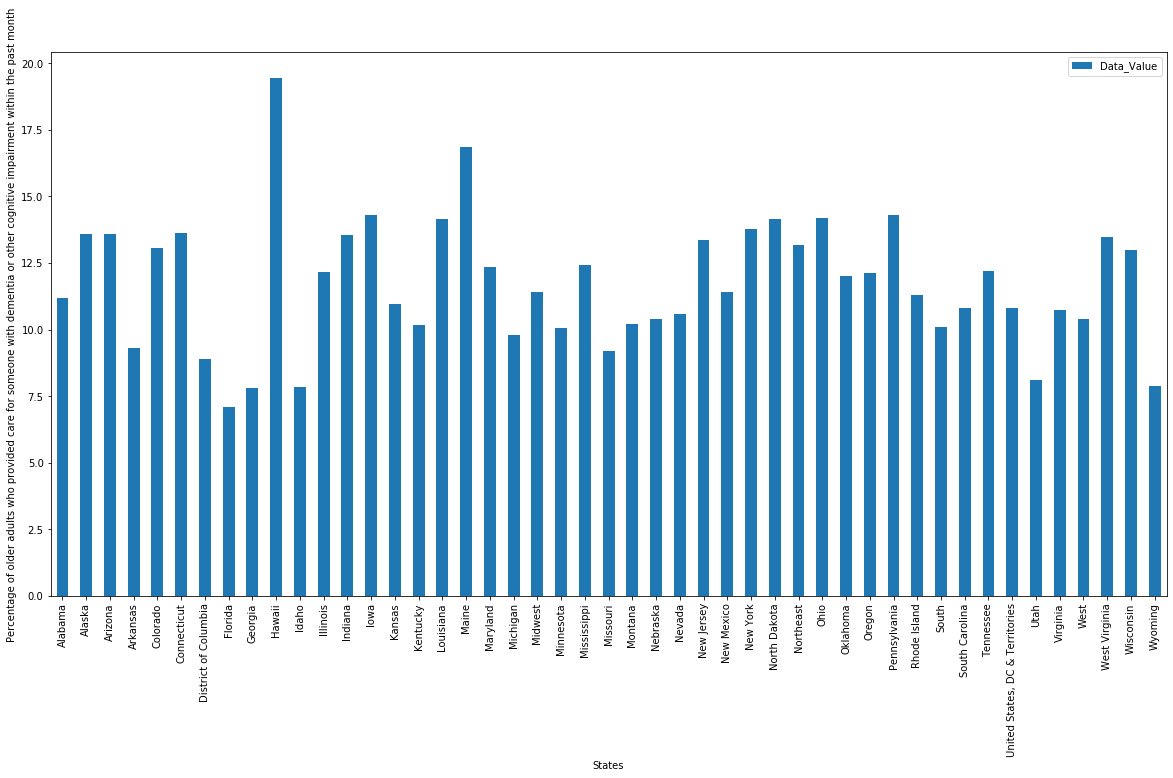

In [38]:
#'Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month'
alzheimer_by_age_3_Q14 = alzheimer_by_age_3[alzheimer_by_age_3.Question ==        'Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month']

#taking only the Data values and State columns
alzheimer_by_age_3_Q14_Data = alzheimer_by_age_3_Q14[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q14_Data[alzheimer_by_age_3_Q14_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q14_Data_Averaged = alzheimer_by_age_3_Q14_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q14_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q14_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel(       'Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month')


This data is interesting because it suggest that almost 20% of older adults in Hawaii were caring for someone with mental disease. However, give that it is a tourist destination, it is interesting Hawaii would have such a high incidence of mental illness. It only has a 9.5% poverty rate, which is among the lowest in the US.

Text(0, 0.5, 'Percentage of older adults who provided care to a friend or family member for six months or more')

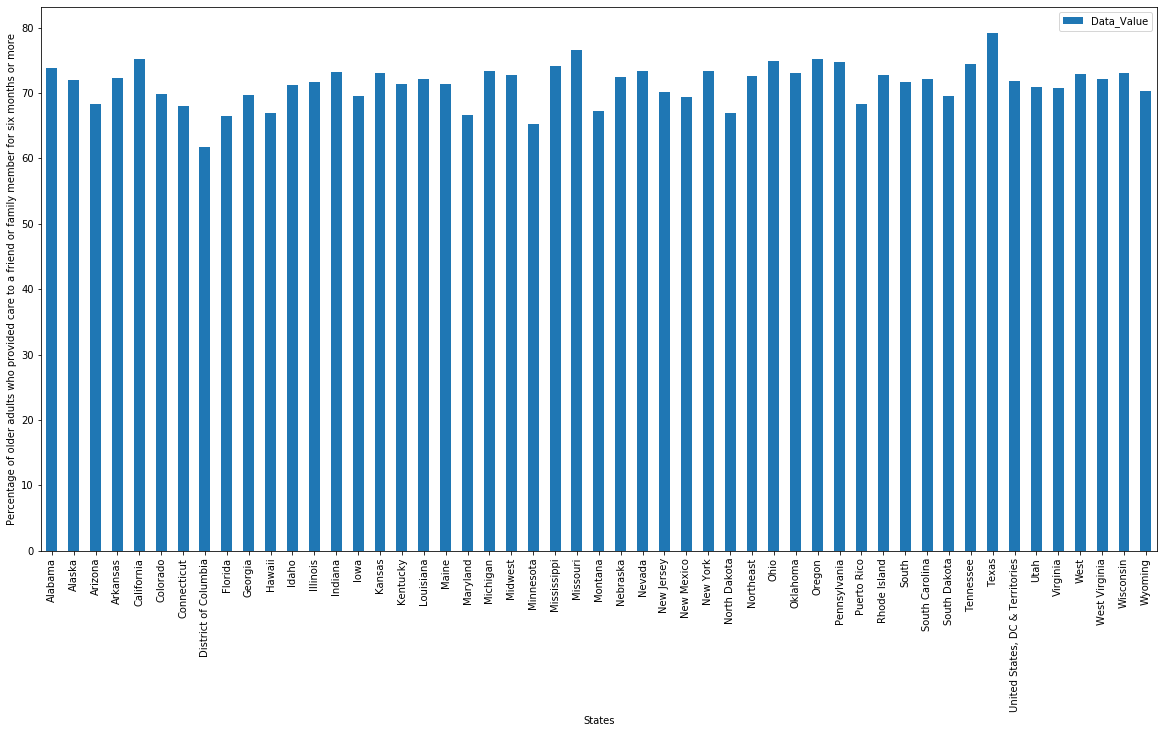

In [39]:
#'Percentage of older adults who provided care to a friend or family member for six months or more'
alzheimer_by_age_3_Q15 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who provided care to a friend or family member for six months or more']

#taking only the Data values and State columns
alzheimer_by_age_3_Q15_Data = alzheimer_by_age_3_Q15[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q15_Data[alzheimer_by_age_3_Q15_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q15_Data_Averaged = alzheimer_by_age_3_Q15_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q15_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q15_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who provided care to a friend or family member for six months or more')


Text(0, 0.5, 'Percentage of older adults who report having a disability (includes limitations related to sensory or mobility impairments or a physical, mental, or emotional condition)')

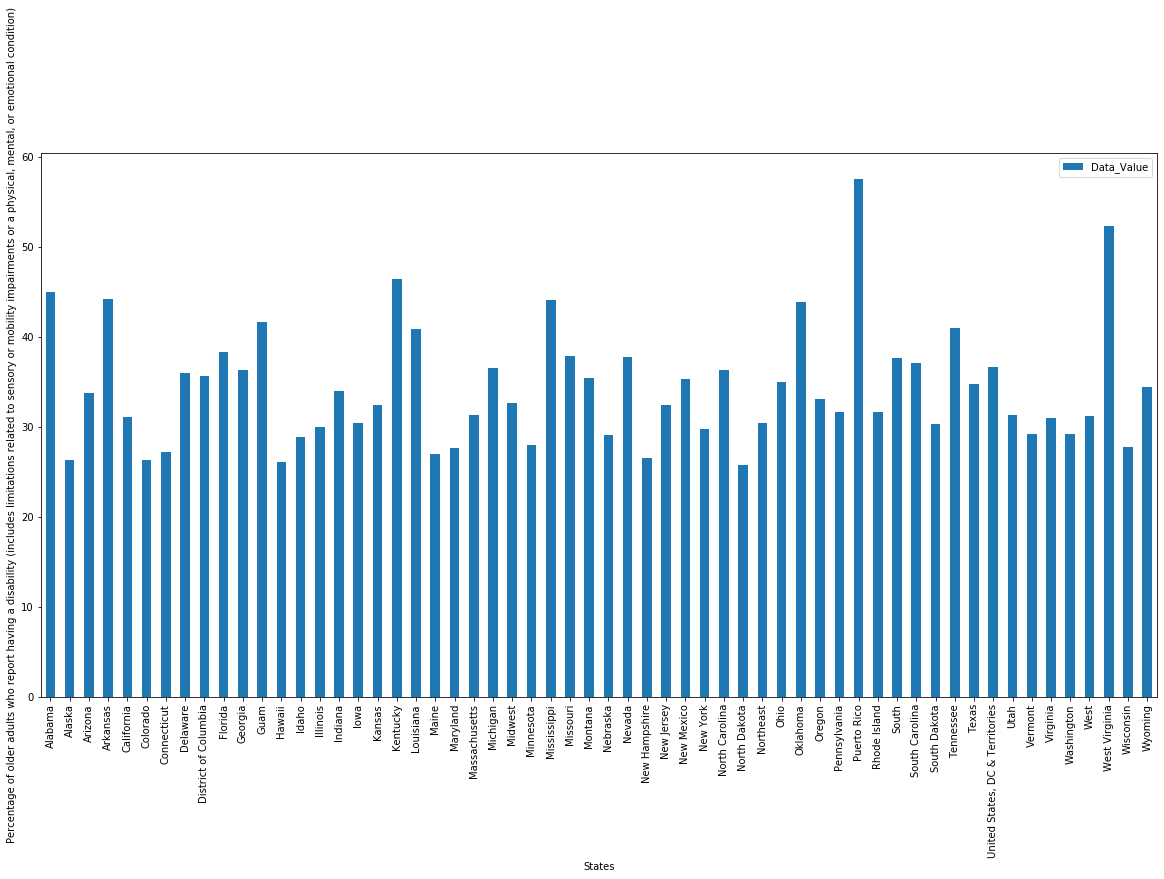

In [40]:
#'Percentage of older adults who report having a disability (includes limitations related to sensory or mobility impairments or a physical, mental, or emotional condition)''
alzheimer_by_age_3_Q16 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who report having a disability (includes limitations related to sensory or mobility impairments or a physical, mental, or emotional condition)']

#taking only the Data values and State columns
alzheimer_by_age_3_Q16_Data = alzheimer_by_age_3_Q16[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q16_Data[alzheimer_by_age_3_Q16_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q16_Data_Averaged = alzheimer_by_age_3_Q16_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q16_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q16_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who report having a disability (includes limitations related to sensory or mobility impairments or a physical, mental, or emotional condition)')


Very interesting to see that while older adults in Hawaii has a high incidence of mental disability, Puerto Rico and West Virginia has the highest physical disabilities. Puerto Rico I can understand given it's third world condition, but it is very interesting to see a mainland US state has over 50% of its older adults in physical disability - with only 10% of its population being veterans (so they cannot explain the 50% physical disability rate in West Virginia). 

Text(0, 0.5, 'Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease')

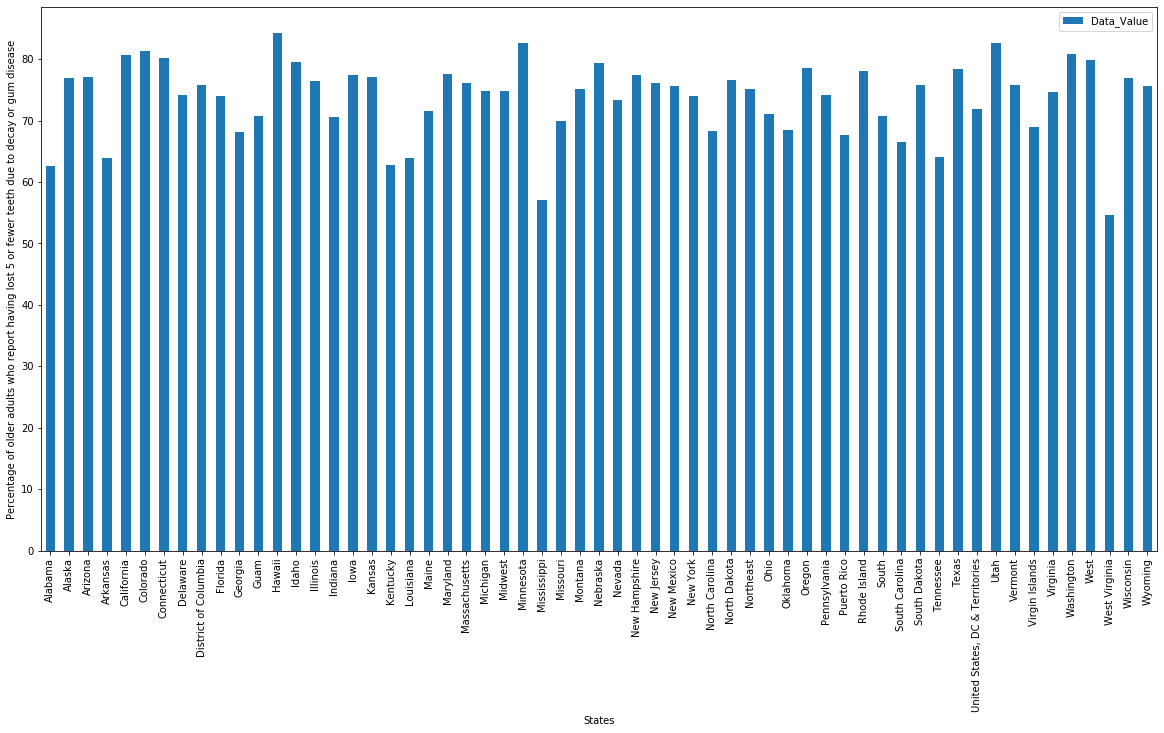

In [41]:
#'Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease'
alzheimer_by_age_3_Q17 = alzheimer_by_age_3[alzheimer_by_age_3.Question ==  'Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease']

#taking only the Data values and State columns
alzheimer_by_age_3_Q17_Data = alzheimer_by_age_3_Q17[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q17_Data[alzheimer_by_age_3_Q17_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q17_Data_Averaged = alzheimer_by_age_3_Q17_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q17_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q17_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who report having lost 5 or fewer teeth due to decay or gum disease')


Text(0, 0.5, 'Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities')

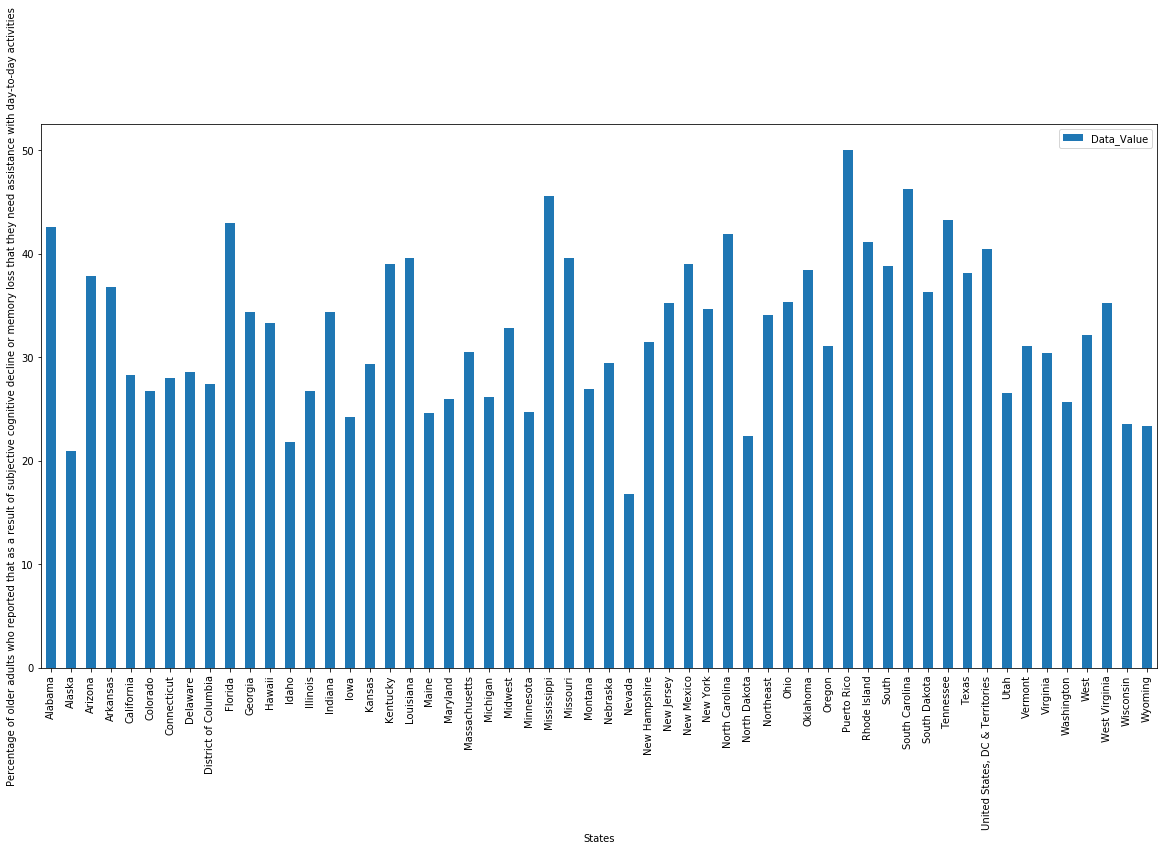

In [42]:
#'Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities'
alzheimer_by_age_3_Q18 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities']
#taking only the Data values and State columns
alzheimer_by_age_3_Q18_Data = alzheimer_by_age_3_Q18[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q18_Data[alzheimer_by_age_3_Q18_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q18_Data_Averaged = alzheimer_by_age_3_Q18_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q18_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q18_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities')


Very interesting that Hawaii has the highest percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month, it is among average for percentage of older adults who reported that as a result of subjective cognitive decline or memory loss that they need assistance with day-to-day activities. These two seems to contradict each other. Maybe older adults in other locations don't tend to provide care for someone with dementia or other cognitive impairment within the past month and leave it mainly up to the professionals?



Text(0, 0.5, 'Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it')

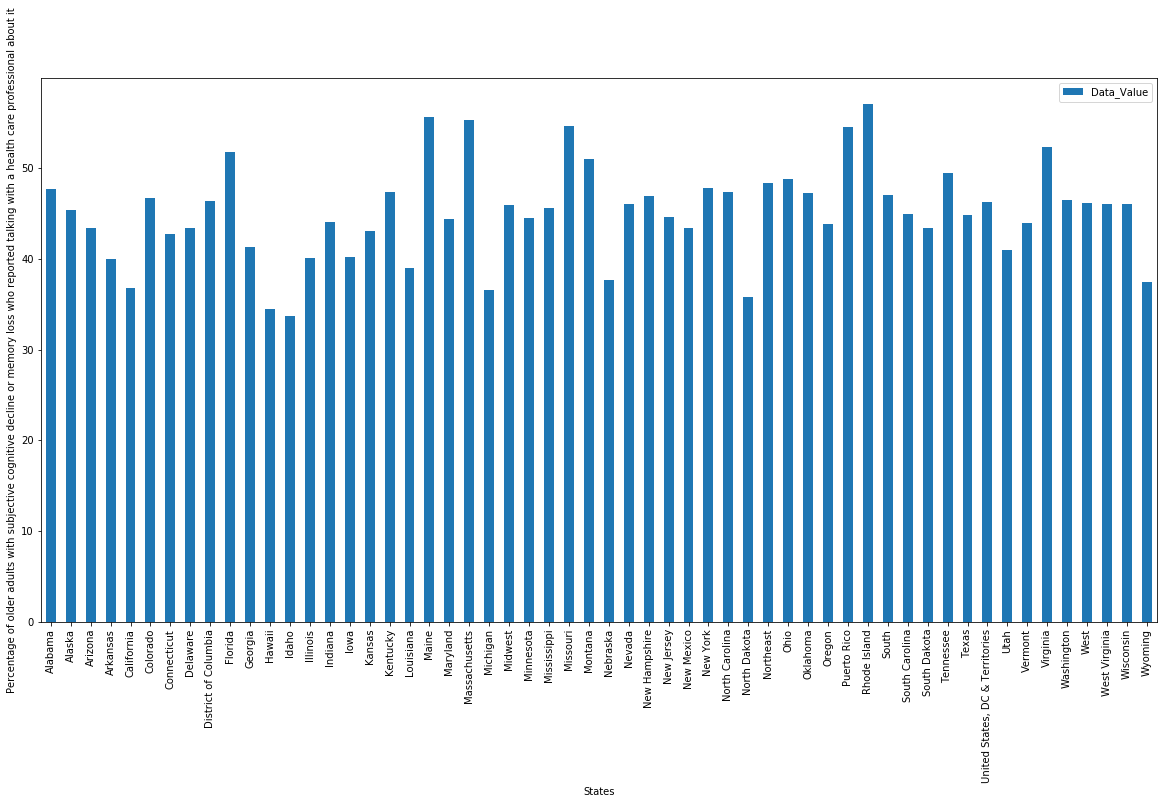

In [43]:
#'Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it'
alzheimer_by_age_3_Q19 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it']
#taking only the Data values and State columns
alzheimer_by_age_3_Q19_Data = alzheimer_by_age_3_Q19[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q19_Data[alzheimer_by_age_3_Q19_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q19_Data_Averaged = alzheimer_by_age_3_Q19_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q19_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q19_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults with subjective cognitive decline or memory loss who reported talking with a health care professional about it')

Text(0, 0.5, 'Percentage of older adults who self-reported that their health is "fair" or "poor"')

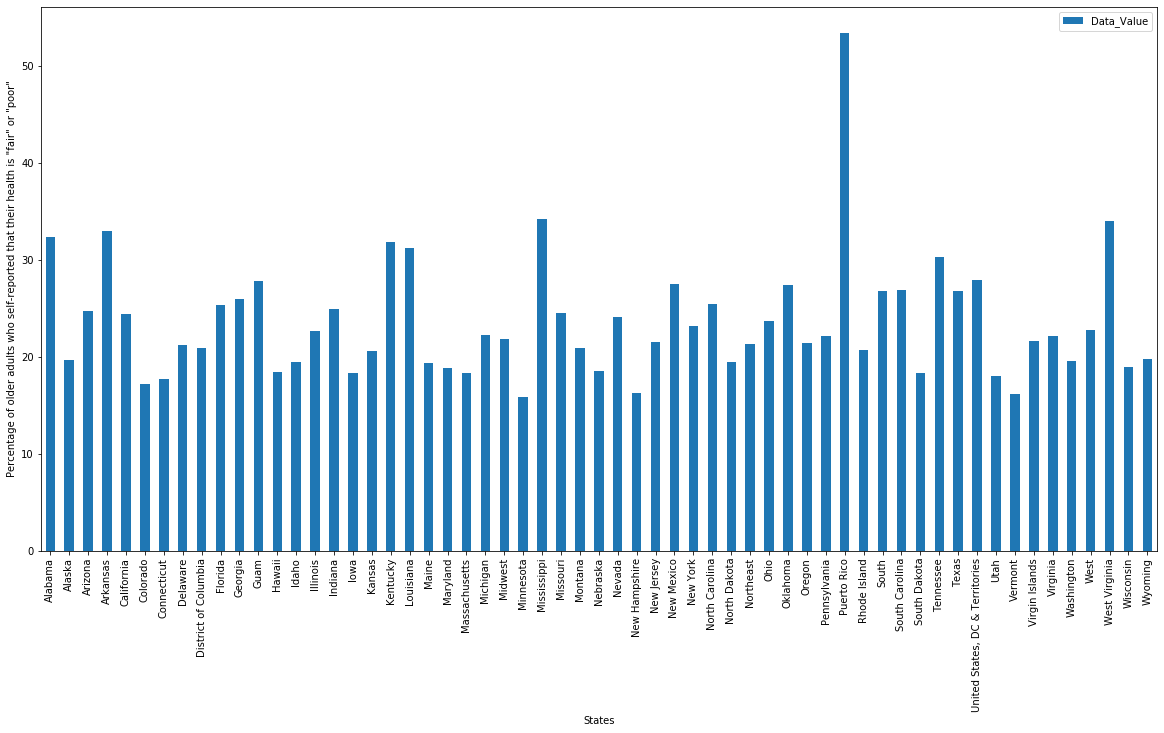

In [44]:
#'Percentage of older adults who self-reported that their health is "fair" or "poor"'
alzheimer_by_age_3_Q20 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who self-reported that their health is "fair" or "poor"']
#taking only the Data values and State columns
alzheimer_by_age_3_Q20_Data = alzheimer_by_age_3_Q20[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q20_Data[alzheimer_by_age_3_Q20_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q20_Data_Averaged = alzheimer_by_age_3_Q20_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q20_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q20_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who self-reported that their health is "fair" or "poor"')

This graph makes sense, it is no surprise that Puerto Rico, with its 44.4% poverty rate, has over half of older adults rating their health as fair or poor. What is a surprise is that there is such a big difference between Puerto Rico, Guam and US Virgin Islands - they are among the 3 poorest US locations, yet their percentage of older adults who self-reported that their health is "fair" or "poor" is so much different. 

Text(0, 0.5, 'Percentage of older adults who self-reported that their health is "good", "very good", or "excellent"')

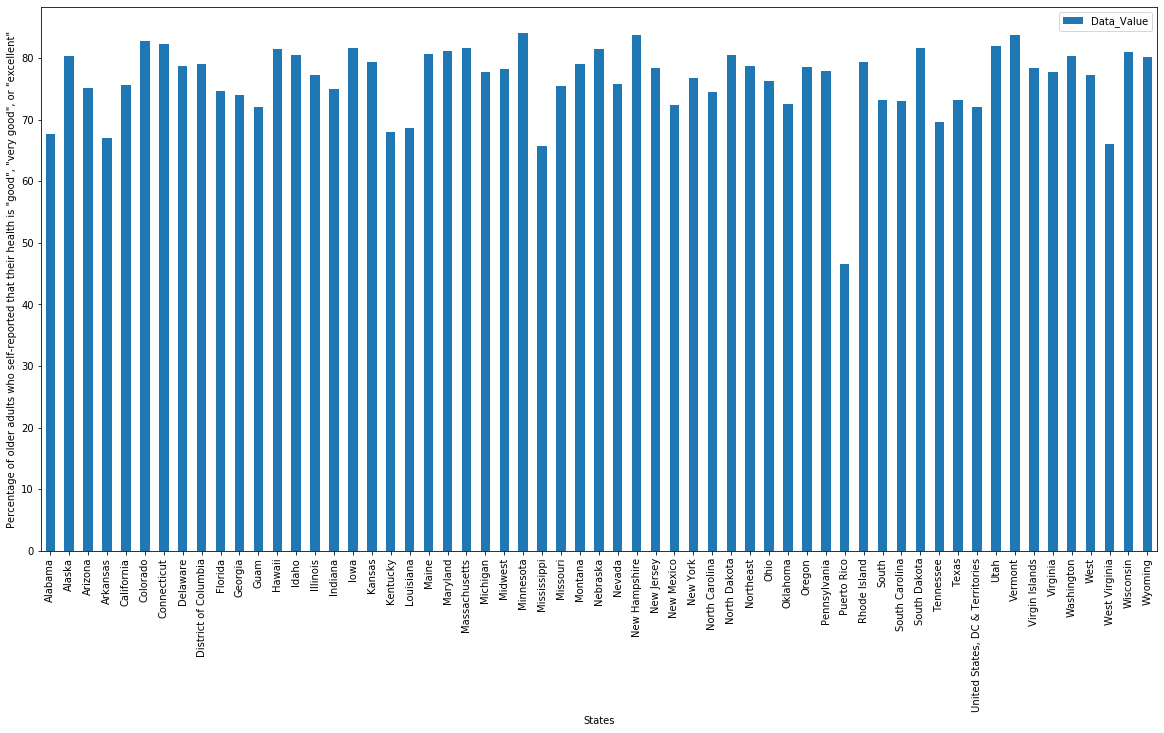

In [45]:
#'Percentage of older adults who self-reported that their health is "good", "very good", or "excellent"'
alzheimer_by_age_3_Q21 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults who self-reported that their health is "good", "very good", or "excellent"']
#taking only the Data values and State columns
alzheimer_by_age_3_Q21_Data = alzheimer_by_age_3_Q21[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q21_Data[alzheimer_by_age_3_Q21_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q21_Data_Averaged = alzheimer_by_age_3_Q21_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q21_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q21_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults who self-reported that their health is "good", "very good", or "excellent"')

Apparently older adults in most every US locations think they are in good health except Puerto Rico.

Text(0, 0.5, 'Percentage of older adults with a lifetime diagnosis of depression')

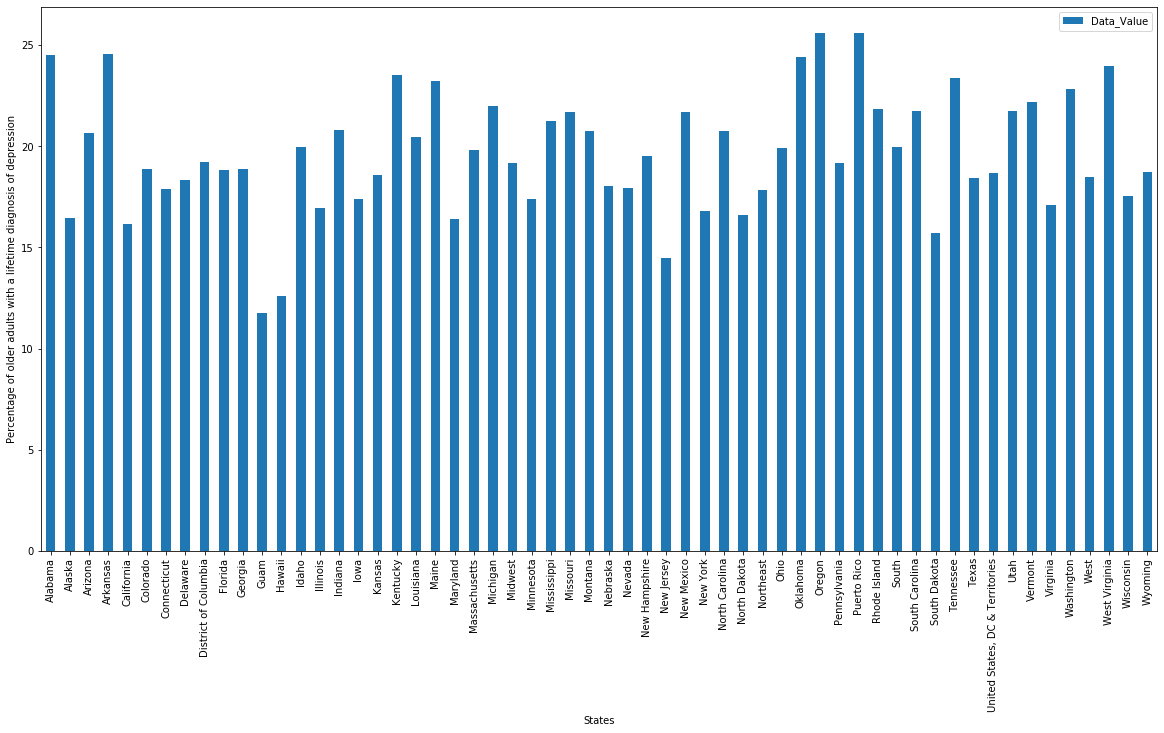

In [46]:
#'Percentage of older adults with a lifetime diagnosis of depression'
alzheimer_by_age_3_Q22 = alzheimer_by_age_3[alzheimer_by_age_3.Question == 'Percentage of older adults with a lifetime diagnosis of depression']
#taking only the Data values and State columns
alzheimer_by_age_3_Q22_Data = alzheimer_by_age_3_Q22[['Data_Value', 'LocationDesc']]

#finds all of the duplicated values
alzheimer_by_age_3_Q22_Data[alzheimer_by_age_3_Q22_Data.duplicated(keep=False)]

#average the duplicated values
alzheimer_by_age_3_Q22_Data_Averaged = alzheimer_by_age_3_Q22_Data.groupby('LocationDesc').mean()

#checks for the presence of any duplicated values
alzheimer_by_age_3_Q22_Data_Averaged.duplicated(subset=None, keep='first')

#generating the bar graph
fig,ax=plt.subplots(figsize =(20,10));alzheimer_by_age_3_Q22_Data_Averaged.plot.bar(ax=ax)
plt.xlabel('States')
plt.ylabel('Percentage of older adults with a lifetime diagnosis of depression')